<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_%D0%9B%D0%BE%D0%BA%D0%BE%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# импорт библиотек
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# загрузка данных, столбец target не грузим!
iris = datasets.load_iris()
data = iris.data

In [3]:
# стандартизация признаков со средним 0 и std 1
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [4]:
# итеративно обучим модели с разным кол-вом кластеров
dist = []
for i in range(1, 11):
  # создание экземпляра кластеризатора
  cluster = KMeans(n_clusters=i,   # кол-во центроидов
                init='k-means++',  # улучшенный алгоритм
                random_state=42,   # зерно
                n_jobs=-1)         # кол-во ядер процессора
  cluster.fit(data_std)
  dist.append(cluster.inertia_)

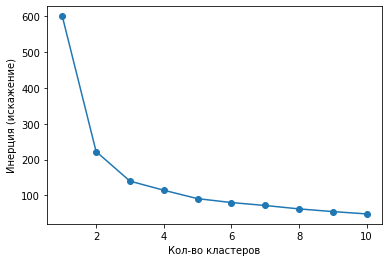

In [11]:
# печать графика локтя
plt.plot(range(1, 11), dist, marker='o')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Инерция (искажение)')
plt.show()

Как видно на результирующем графике, локоть находится в точке k = 3,  свидетельствуя о том, что k = 3  - хороший выбор для этого набора данных.